<a href="https://colab.research.google.com/github/SeyfGoumeida/PFE/blob/main/M%C3%A9moire_Master_2_MLSD_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mémoire

# Packages

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.cluster import KMeans
import gspread
import pandas as pd
import matplotlib.pyplot as plt
import csv
from datetime import datetime

# Data :

In [74]:
link = "/content/Caisse_ideal.csv"
archive                = pd.read_csv(link, sep=",")
archive

,stoanabelkey,stodisplaydesc,Jour,creationDate,Heure,Caisses_Prevues,Caisses_Planifiees,Ecart_en_Nb_de_Caisses,Prevues_en_H,Planifiees_en_H,...,Trois_et_plus,Caisses_max,Semaine,Nom_Usage,DR,DO,regionDesc,postcode,geoX,geoY
0,7880,MIRECOURT,Jeudi,2021-11-02,08:30:00,1,2,1,0.25,0.50,...,0.0,10,44,MIRECOURT,OUADI AMAR,NORD ET EST,DEI HORS PARIS INTRA,88500.0,6.131070,48.303820
1,7880,MIRECOURT,Jeudi,2021-11-02,08:45:00,1,3,2,0.25,0.75,...,0.0,10,44,MIRECOURT,OUADI AMAR,NORD ET EST,DEI HORS PARIS INTRA,88500.0,6.131070,48.303820
2,7880,MIRECOURT,Jeudi,2021-11-02,09:00:00,2,3,1,0.50,0.75,...,0.0,10,44,MIRECOURT,OUADI AMAR,NORD ET EST,DEI HORS PARIS INTRA,88500.0,6.131070,48.303820
3,7880,MIRECOURT,Jeudi,2021-11-02,09:15:00,2,3,1,0.50,0.75,...,0.0,10,44,MIRECOURT,OUADI AMAR,NORD ET EST,DEI HORS PARIS INTRA,88500.0,6.131070,48.303820
4,7880,MIRECOURT,Jeudi,2021-11-02,09:30:00,2,3,1,0.50,0.75,...,0.0,10,44,MIRECOURT,OUADI AMAR,NORD ET EST,DEI HORS PARIS INTRA,88500.0,6.131070,48.303820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1232074,6865,PARIS -SEVRES 42,Dimanche,2022-03-20,12:45:00,8,8,0,2.00,2.00,...,0.0,15,12,NaN,MESSAOUDI NADIA,NaN,PARIS INTRAMUROS,75007.0,2.321171,48.848785
1232075,7583,PARIS -ST MARCEL,Dimanche,2022-03-20,12:45:00,3,7,4,0.75,1.75,...,0.0,15,12,NaN,PERROT KARINE,NaN,PARIS INTRAMUROS,75013.0,2.354026,48.837487
1232076,7805,RUBELLES,Dimanche,2022-03-20,12:45:00,1,6,5,0.25,1.50,...,0.0,14,12,NaN,BOUTIN DAMIEN,ILE DE FRANCE,DEI HORS PARIS INTRA,77950.0,2.672130,48.552070
1232077,7567,RUEIL MALM -COLMAR,Dimanche,2022-03-20,12:45:00,9,10,1,2.25,2.50,...,0.0,12,12,Market Rueil-Malmaison Colmar,BLERVACQUES SEBASTIE,ILE DE FRANCE,DEI HORS PARIS INTRA,92500.0,2.179848,48.886030


In [75]:
archive["Scoring"]=0.0
archive.dtypes

stoanabelkey                          int64
stodisplaydesc                       object
Jour                                 object
creationDate                         object
Heure                                object
Caisses_Prevues                       int64
Caisses_Planifiees                    int64
Ecart_en_Nb_de_Caisses                int64
Prevues_en_H                        float64
Planifiees_en_H                     float64
Ecart_en_H                          float64
Nb_de_Caisses_Ouvertes                int64
Caisses_Ouvertes_en_H               float64
Ecart_sous_couverture               float64
Taux_sous_couverture                float64
Ecart_sur_couverture                float64
Taux_sur_couverture                 float64
Ecart_sur_sous_couverture           float64
attente_en_caisse                   float64
Taux_SCO                            float64
Taux_Redirection_a_la_journee       float64
Nb_interactions_SCO                   int64
Nb_interactions_Total           

## 1. UNIVARIATE SCATTER PLOT :


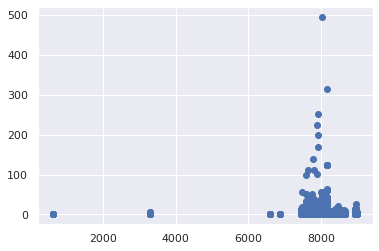

In [76]:
plt.scatter(archive["stoanabelkey"],archive['attente_en_caisse'])
plt.show()

sns.scatterplot (x-df. index, y-df[' sepal.width'], hue-df['variety' ])

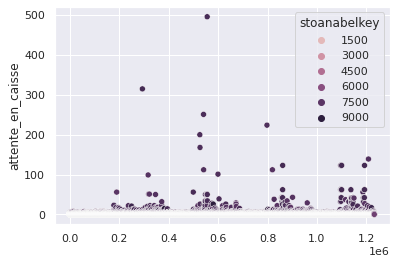

In [77]:
sns.scatterplot (x=archive. index, y=archive['attente_en_caisse'], hue=archive['stoanabelkey' ])

## Box Plot :

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


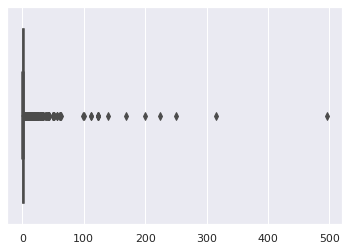

In [122]:
sns.boxplot(sorted(archive['attente_en_caisse']))


In [123]:
#define outlier to delete in the column (attente_en_caisse)
outlier = 10
indexes = archive[archive.attente_en_caisse > outlier].index
archive.drop(indexes, axis=0, inplace=True)
#delete the NAN values in the column (attente_en_caisse)
archive.dropna(subset= ["attente_en_caisse"],inplace=True)
sorted(archive['attente_en_caisse'].unique())


[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


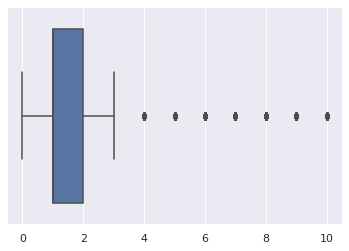

In [124]:
sns.boxplot(sorted(archive['attente_en_caisse']))


In [125]:
archive['attente_en_caisse'].value_counts()


1.0     587408
2.0     359790
0.0     241040
3.0      39191
4.0       3003
5.0        554
6.0        242
7.0        144
8.0         76
9.0         48
10.0        26
Name: attente_en_caisse, dtype: int64

In a period of 4 months we can see that we have a small number of occurence of the "attente en caisse" between 5-10 and we see that also in the boxplot. this number increase with an exponencial power down to 0,1,2 "attente en caisse".

so we can erase these lines and keep only the values of 0,1,2 and 3+. the 3+ will contains all the values + than 3 .

In [126]:
#define outlier to delete in the column (attente_en_caisse)
outlier = 7
indexes = archive[archive.attente_en_caisse > outlier].index
archive.drop(indexes, axis=0, inplace=True)

In [127]:
#put all values of attente_en_caisse where >3 in 3+ attente_en_caisse
archive.loc[archive.attente_en_caisse > 3, "attente_en_caisse"] = 3
archive['attente_en_caisse'].value_counts()


1.0    587408
2.0    359790
0.0    241040
3.0     43134
Name: attente_en_caisse, dtype: int64

## Scoring : 

In [79]:
archive.loc[archive.attente_en_caisse == 0, "Scoring"] = 3
archive.loc[archive.attente_en_caisse == 1, "Scoring"] = 2
archive.loc[archive.attente_en_caisse == 2, "Scoring"] = 1
archive.loc[archive.attente_en_caisse == 3, "Scoring"] = 0

archive['Scoring'].value_counts()


2.0    587408
1.0    359790
3.0    241040
0.0     43841
Name: Scoring, dtype: int64

In [111]:
archive[["stodisplaydesc","Scoring"]].groupby(["stodisplaydesc"]).sum().sort_values(by=['Scoring'], ascending=False).head(20)


,Scoring
stodisplaydesc,
PARIS -SEINE,12326.0
ST MAURICE,12311.0
MILLY LA FORET,11440.0
BORDEAUX -ST JEAN,11036.0
FONTENAY AUX ROSES,10996.0
LE TOUQUET,10953.0
ST GERMAIN EN LAYE,10847.0
CHARTRETTES,10810.0
BELLEGARDE S/VAL-REP,10712.0


## Scoring 2:

In [131]:
archive.groupby(["attente_en_caisse","stoanabelkey","creationDate"]).size()

attente_en_caisse  stoanabelkey  creationDate
0.0                613           2022-01-24      54
                                 2022-01-25      52
                                 2022-01-26      54
                                 2022-01-27      52
                                 2022-01-28      54
                                                 ..
3.0                9002          2021-12-17       1
                                 2022-02-17       1
                                 2022-02-26       1
                                 2022-03-11       1
                                 2022-03-16       2
Length: 101619, dtype: int64

In [150]:
link2 = "/content/Attente Dec-Avril.csv"
attente                = pd.read_csv(link2, sep=",")
attente.sort_values(by=['creationDate'], ascending=False)
attente["Scoring"]=0.0


In [151]:
#date format
from datetime import datetime
for k in range(0,len(attente[['Magasin']])):
  date = datetime.strptime(str(attente.at[k, "creationDate"]),'%d %b %Y')	
  date = datetime.strptime(str(date),"%Y-%m-%d %H:%M:%S").strftime("%Y-%m-%d")
  attente.at[k, "creationDate"] = date

In [152]:
attente.sort_values(by=['creationDate'], ascending=False)

,creationDate,Magasin (code Anabel),Magasin,Nb Rep,Nb 0,Nb 1,Nb 2,Nb 3+,Taux_0,Taux_1,Taux_2,Taux_3,Scoring
24419,2022-04-02,7905,Market Rouvroy,46,2,23,18,3,0.043478,0.500000,0.391304,0.065217,0.0
10083,2022-04-02,7952,Market Eperlecques,44,1,27,15,1,0.022727,0.613636,0.340909,0.022727,0.0
28322,2022-04-02,7604,Market Sète,47,8,35,4,0,0.170213,0.744681,0.085106,0.000000,0.0
6724,2022-04-02,7649,Market Buchy,43,2,27,14,0,0.046512,0.627907,0.325581,0.000000,0.0
19478,2022-04-02,7881,Market Morangis,47,1,14,29,3,0.021277,0.297872,0.617021,0.063830,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5838,2021-12-01,7975,Market Bourbourg,7,3,2,2,0,0.428571,0.285714,0.285714,0.000000,0.0
10062,2021-12-01,7952,Market Eperlecques,12,2,7,3,0,0.166667,0.583333,0.250000,0.000000,0.0
11155,2021-12-01,7575,Market Fontenay-Aux-Roses,17,10,4,2,1,0.588235,0.235294,0.117647,0.058824,0.0
11630,2021-12-01,7781,Market Gometz La Ville,11,3,2,1,5,0.272727,0.181818,0.090909,0.454545,0.0


In [172]:
score_attente_0 = 5
score_attente_1 = 2
score_attente_2 = 0
score_attente_3_et_plus = -5


attente["Scoring"] = attente["Taux_0"]*score_attente_0+attente["Taux_1"]*score_attente_1+attente["Taux_2"]*score_attente_2+attente["Taux_3"]*score_attente_3_et_plus
attente[["Magasin","Magasin (code Anabel)","Scoring"]].groupby(["Magasin","Magasin (code Anabel)"]).sum().sort_values(by=['Scoring'], ascending=False).head(20)


,,Scoring
Magasin,Magasin (code Anabel),
Market Le Touquet,7967,452.568554
Market Saint-Maurice,7809,400.548469
Market Neuville-Les-Dieppe Libération,7573,382.781453
Market Chartrettes,7824,373.680259
Market Estaires,7858,372.492759
Market Fontenay-Aux-Roses,7575,366.630164
Market Moirans,8035,351.269662
Market Milly-La-Forêt,7879,349.409734
Market Pierres,8154,347.162614


,Scoring
Magasin (code Anabel),
7967,309.252918
7809,292.257050
7573,286.550140
7824,283.007431
7858,282.488753
7575,281.344196
8035,275.936108
7879,274.210162
8154,273.880884


In [133]:
tab1= pd.merge(archive,attente,how='right',left_on=['anabel','Heure de début'],right_on=['mag_cod_magasin','DEBUT'])


,stoanabelkey,stodisplaydesc,Jour,creationDate,Heure,Caisses_Prevues,Caisses_Planifiees,Ecart_en_Nb_de_Caisses,Prevues_en_H,Planifiees_en_H,...,Caisses_max,Semaine,Nom_Usage,DR,DO,regionDesc,postcode,geoX,geoY,Scoring
0,7880,MIRECOURT,Jeudi,2021-11-02,08:30:00,1,2,1,0.25,0.50,...,10,44,MIRECOURT,OUADI AMAR,NORD ET EST,DEI HORS PARIS INTRA,88500.0,6.131070,48.303820,3.0
1,7880,MIRECOURT,Jeudi,2021-11-02,08:45:00,1,3,2,0.25,0.75,...,10,44,MIRECOURT,OUADI AMAR,NORD ET EST,DEI HORS PARIS INTRA,88500.0,6.131070,48.303820,3.0
2,7880,MIRECOURT,Jeudi,2021-11-02,09:00:00,2,3,1,0.50,0.75,...,10,44,MIRECOURT,OUADI AMAR,NORD ET EST,DEI HORS PARIS INTRA,88500.0,6.131070,48.303820,2.0
3,7880,MIRECOURT,Jeudi,2021-11-02,09:15:00,2,3,1,0.50,0.75,...,10,44,MIRECOURT,OUADI AMAR,NORD ET EST,DEI HORS PARIS INTRA,88500.0,6.131070,48.303820,2.0
4,7880,MIRECOURT,Jeudi,2021-11-02,09:30:00,2,3,1,0.50,0.75,...,10,44,MIRECOURT,OUADI AMAR,NORD ET EST,DEI HORS PARIS INTRA,88500.0,6.131070,48.303820,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1232074,6865,PARIS -SEVRES 42,Dimanche,2022-03-20,12:45:00,8,8,0,2.00,2.00,...,15,12,NaN,MESSAOUDI NADIA,NaN,PARIS INTRAMUROS,75007.0,2.321171,48.848785,3.0
1232075,7583,PARIS -ST MARCEL,Dimanche,2022-03-20,12:45:00,3,7,4,0.75,1.75,...,15,12,NaN,PERROT KARINE,NaN,PARIS INTRAMUROS,75013.0,2.354026,48.837487,3.0
1232076,7805,RUBELLES,Dimanche,2022-03-20,12:45:00,1,6,5,0.25,1.50,...,14,12,NaN,BOUTIN DAMIEN,ILE DE FRANCE,DEI HORS PARIS INTRA,77950.0,2.672130,48.552070,3.0
1232077,7567,RUEIL MALM -COLMAR,Dimanche,2022-03-20,12:45:00,9,10,1,2.25,2.50,...,12,12,Market Rueil-Malmaison Colmar,BLERVACQUES SEBASTIE,ILE DE FRANCE,DEI HORS PARIS INTRA,92500.0,2.179848,48.886030,1.0


# Plots : 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


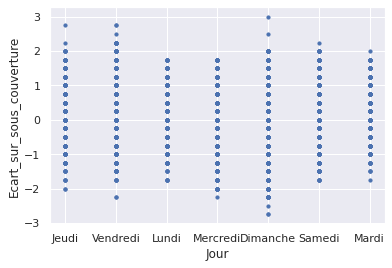

In [4]:
X, y_true = archive.loc[:, archive.columns != 'stoanabelkey' ],archive.Taux_sous_couverture
#df.drop('b', axis=1)
archive.plot.scatter(x = 'Jour', y = 'Ecart_sur_sous_couverture', s = 10);

In [ ]:
X = archive.loc[:, archive.columns != 'stoanabelkey' ]
X = archive

X = X.loc[:, X.columns != 'creationDate' ]
X = X.loc[:, X.columns != 'Heure' ]
X = X.loc[:, X.columns != 'Nom_Usage' ]
X = X.loc[:, X.columns != 'DR' ]
X = X.loc[:, X.columns != 'DO' ]
X = X.loc[:, X.columns != 'Nb_interactions_SCO_total' ]
X = X.loc[:, X.columns != 'Nb_interactions_SCOetTradi_total' ]
X = X.loc[:, X.columns != 'Ecart_en_Nb_de_Caisses' ]
X = X.loc[:, X.columns != 'Prevues_en_H' ]
X = X.loc[:, X.columns != 'Planifiees_en_H' ]
X = X.loc[:, X.columns != 'Caisses_Ouvertes_en_H' ]
X = X.loc[:, X.columns != 'Ecart_en_H' ]
X = X.loc[:, X.columns != 'Ecart_sous_couverture' ]
X = X.loc[:, X.columns != 'Taux_sous_couverture' ]
X = X.loc[:, X.columns != 'Ecart_sur_couverture' ]
X = X.loc[:, X.columns != 'Taux_sur_couverture' ]
X = X.loc[:, X.columns != 'Ecart_sur_sous_couverture' ]
X = X.loc[:, X.columns != 'Taux_SCO' ]
X = X.loc[:, X.columns != 'Taux_Redirection_a_la_journee' ]
X = X.drop(columns=['stodisplaydesc'])
X = X.replace("Lundi", 1)
X = X.replace("Mardi", 2)
X = X.replace("Mercredi", 3)
X = X.replace("Jeudi", 4)
X = X.replace("Vendredi", 5)
X = X.replace("Samedi", 6)
X = X.replace("Dimanche", 7)

X = X.dropna()
X

,stoanabelkey,Jour,Caisses_Prevues,Caisses_Planifiees,Nb_de_Caisses_Ouvertes,attente_en_caisse,Nb_interactions_SCO,Nb_interactions_Total,Trois_et_plus,Caisses_max,Semaine
0,8669,7,17,17,13,1.0,0,0,0.0,19,1
1,8064,7,12,13,12,2.0,0,0,0.0,13,1
2,7881,7,14,15,12,4.0,0,0,4.0,14,1
3,7869,7,11,11,12,2.0,0,0,0.0,13,1
4,8032,7,15,15,12,3.0,0,0,3.0,18,1
...,...,...,...,...,...,...,...,...,...,...,...
311812,7831,1,10,11,11,2.0,0,0,0.0,16,5
311813,7831,1,10,11,11,2.0,0,0,0.0,16,5
311814,7831,1,10,11,11,2.0,0,0,0.0,16,5
311815,7631,1,10,10,11,2.0,0,0,0.0,17,5


In [ ]:
X.columns

Index(['stoanabelkey', 'Jour', 'Caisses_Prevues', 'Caisses_Planifiees',
       'Nb_de_Caisses_Ouvertes', 'attente_en_caisse', 'Nb_interactions_SCO',
       'Nb_interactions_Total', 'Trois_et_plus', 'Caisses_max', 'Semaine'],
      dtype='object')

In [ ]:
X["attente_en_caisse"]

0         1.0
1         2.0
2         4.0
3         2.0
4         3.0
         ... 
311812    2.0
311813    2.0
311814    2.0
311815    2.0
311816    1.0
Name: attente_en_caisse, Length: 311508, dtype: float64

In [ ]:
attente_max = 10000
to_be_delete =[]
print("à garder ")
for i in list(X["attente_en_caisse"].value_counts().index.values):
  if(X["attente_en_caisse"].value_counts()[i])<attente_max :
    to_be_delete.append(i)
  else:
    print(" Attente ",i," | Occurence ", X["attente_en_caisse"].value_counts()[i])


à garder 
 Attente  1.0  | Occurence  146491
 Attente  2.0  | Occurence  95900
 Attente  0.0  | Occurence  54819
 Attente  3.0  | Occurence  12766


SUPPRIMER LES VALEURS RARES DE attente_en_caisse

In [ ]:
X["attente_en_caisse"].value_counts()
for i in to_be_delete :
  X = X[X.attente_en_caisse != i]
X["attente_en_caisse"].value_counts()


1.0    146491
2.0     95900
0.0     54819
3.0     12766
Name: attente_en_caisse, dtype: int64

In [ ]:
X.isnull().values.any()
#X.isnull().sum()

False

In [ ]:
y_true = X["attente_en_caisse"]
X = X.loc[:, X.columns != 'attente_en_caisse' ]


In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [ ]:
print(y_true)

0         1.0
1         2.0
3         2.0
4         3.0
6         2.0
         ... 
311812    2.0
311813    2.0
311814    2.0
311815    2.0
311816    1.0
Name: attente_en_caisse, Length: 309976, dtype: float64


In [ ]:
from sklearn.metrics.cluster import completeness_score
print(completeness_score(y_true,y_kmeans))


0.001243256293647487


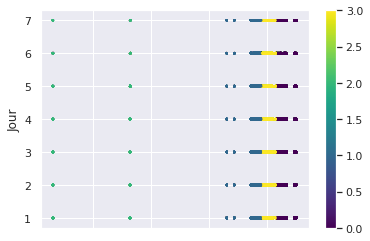

In [ ]:
#plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
X.plot.scatter(x = 'stoanabelkey', y = 'Jour', c=y_kmeans, s=2, cmap='viridis');
centers = kmeans.cluster_centers_
#plt.scatter(centers[:, 0], centers[:, 1], c='black', s=2, alpha=0.5)

In [ ]:
from sklearn.metrics import pairwise_distances_argmin
def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

0.0     3864
3.0      144
4.0        9
6.0        2
13.0       1
7.0        1
5.0        1
Name: 3plus, dtype: int64


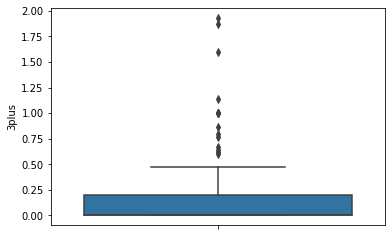

In [ ]:
import matplotlib.pyplot as plt

print(BDD["3plus"].value_counts())

import seaborn as sns

ax = sns.boxplot(y="3plus", data=BDD.groupby(['Anabel']).mean())
plt.show() 

# Si on inverse x et y, les barres deviennent horizontales

plt.show()
# Cette dernière ligne plt.gca() permet d'ajouter des étiquettes aux boîtes


# TEST : 


In [ ]:
!pip install qwikidata
!pip install pycountry

     |████████████████████████████████| 10.1 MB 5.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=2ec2e1324419a1716abce9a70d5545c61217d703c8f834db8b6e94c322a73c16
  Stored in directory: /root/.cache/pip/wheels/0e/06/e8/7ee176e95ea9a8a8c3b3afcb1869f20adbd42413d4611c6eb4
Successfully built pycountry


In [ ]:

import qwikidata
import qwikidata.sparql

def get_city_wikidata(city, country):
    query = """
    SELECT ?city ?cityLabel ?country ?countryLabel ?population
    WHERE
    {
      ?city rdfs:label '%s'@en.
      ?city wdt:P1082 ?population.
      ?city wdt:P17 ?country.
      ?city rdfs:label ?cityLabel.
      ?country rdfs:label ?countryLabel.
      FILTER(LANG(?cityLabel) = "en").
      FILTER(LANG(?countryLabel) = "en").
      FILTER(CONTAINS(?countryLabel, "%s")).
    }
    """ % (city, country)

    res = qwikidata.sparql.return_sparql_query_results(query)
    out = res['results']['bindings'][0]
    return out

get_city_wikidata('Paris', 'France')

{'city': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q90'},
 'cityLabel': {'type': 'literal', 'value': 'Paris', 'xml:lang': 'en'},
 'country': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q142'},
 'countryLabel': {'type': 'literal', 'value': 'France', 'xml:lang': 'en'},
 'population': {'datatype': 'http://www.w3.org/2001/XMLSchema#decimal',
  'type': 'literal',
  'value': '2165423'}}